In [2]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt


In [3]:
#影像閥值操作
img_path = "data/opencv.png"
#自動選擇閥值

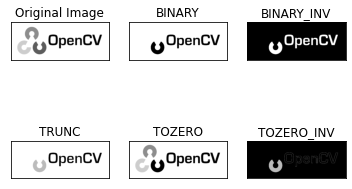

In [4]:
img = cv2.imread(img_path,0)

if img is None:
    sys.exit("無法讀取影像...")

#小於閥值則設為0,其餘像素設為最大值
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

#反向操作，小於閥值則設為255,其餘像素設為0
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

#小於閥值則設為255,其餘像素保留原像素值
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)

#小於閥值則設為0,其餘像素保留原像素值
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)

#反向操作,小於閥值保留原向像素值,其餘像素為0
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

k = cv2.waitKey(0)
cv2.destroyAllWindows() 


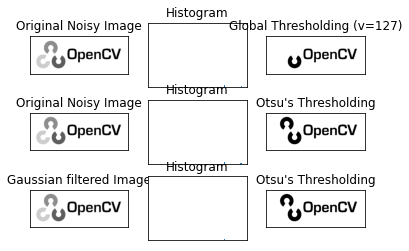

In [5]:

img = cv2.imread(img_path,0)

if img is None:
    sys.exit("無法讀取影像...")

# 固定整張影像閥值分割
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's統計影像動態選擇分割閥值
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's 增加高斯濾波器後處理
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# 輸出個別差異統計
images = [img, 0, th1,
            img, 0, th2,
            blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding",
            'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
k = cv2.waitKey(0)
cv2.destroyAllWindows() 